In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
X_digits, y_digits = load_digits(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [4]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [5]:
log_reg.score(X_test, y_test)

0.8244444444444444

Let’s see how we can do better.
* First, let’s cluster the training set into 50
clusters.
* Then for each cluster, let’s find the image closest to the centroid.

We will call these images the representative images:

In [6]:
from sklearn.cluster import KMeans
import numpy as np

k = 50
kmeans = KMeans(n_clusters=k)

X_digits_dist = kmeans.fit_transform(X_train)
print(f'The shape of X_digits_dist: {X_digits_dist.shape}. \nEach row is the distance to 50 centroids \nEach col in the distance to one centroid \n')

# Find closest image to each centroid
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
print(f'Closest sample to each centroid: \n{representative_digit_idx}, {representative_digit_idx.shape}\n')

# Extract representative images
X_representative_digits = X_train[representative_digit_idx]
print(f'{X_representative_digits.shape}: Each row corresponds to one image')

The shape of X_digits_dist: (1347, 50). 
Each row is the distance to 50 centroids 
Each col in the distance to one centroid 

Closest sample to each centroid: 
[ 818  795  372  200   76  126  786 1267 1330  149  148  686 1079  444
  667  798 1175  603  962  629  130 1236 1339  850   72 1298  523  314
 1336 1124  619  983  134 1233  445  952  487  482   17  172  979  923
  390  469 1266  934  864 1346  370  323], (50,)

(50, 64): Each row corresponds to one image


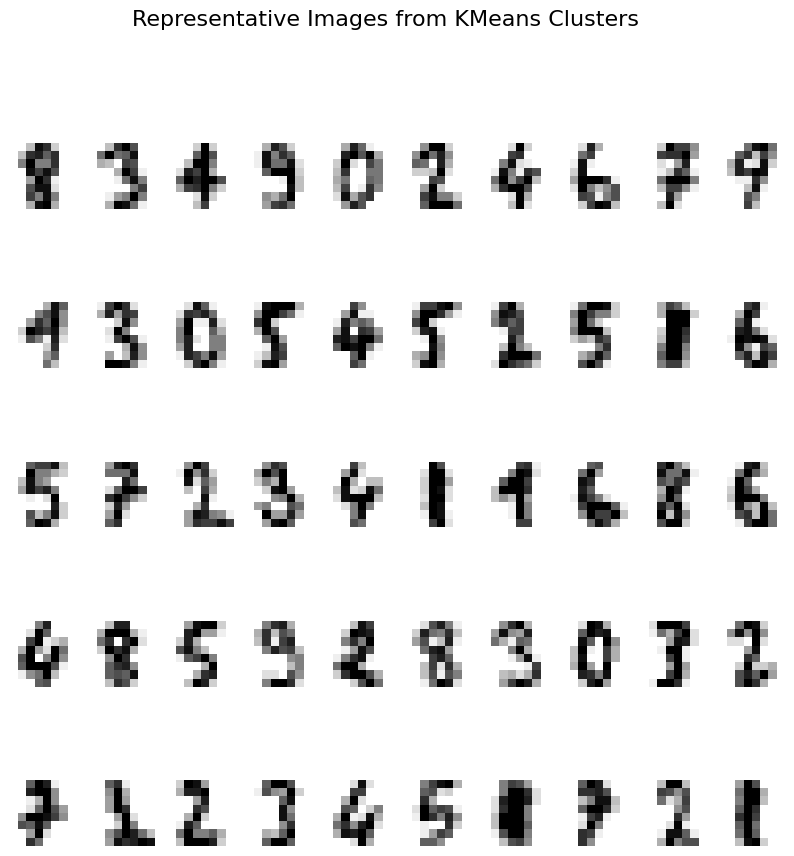

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for index, image in enumerate(X_representative_digits):
    plt.subplot(5, 10, index + 1)
    plt.imshow(image.reshape(8, 8), cmap="binary")
    plt.axis("off")

plt.suptitle("Representative Images from KMeans Clusters", fontsize=16)
plt.show()

# Look at each image and manually label it as an Exercise:

In [14]:
y_representative_digits = np.array([8 , 3 , 4 , 9 , 0 , 2 , 4 , 6 , 7 , 9 , 4 , 3 , 0 , 5 , 4 , 5 , 1 , 5 , 1 , 6 , 5 , 7 , 1 , 3 , 4 , 1 , 4 , 6 , 8 , 6 , 4 , 8 , 5 , 9 , 2 , 8 , 3 , 0 , 3 , 1 , 7 , 1 , 2 , 3 , 4 , 5 , 4 , 7 , 2 , 1])

Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster. Let’s see if the performance is any better:

In [19]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.7844444444444445